In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML/Project/survey_results_public v1.csv')

The dataset contains over 64,000 responses to 60 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame.

In [4]:
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

That shortcodes for questions have been used as column names.

We can refer to the schema file to see the full text of each question. The schema file contains two columns: qname and question.

In [5]:
schema = pd.read_csv('/content/drive/MyDrive/ML/Project/survey_results_schema.csv')

In [11]:
schema[['qname','question']]

,qname,question
0,S0,"<div><span style=""font-size:19px;""><strong>Hel..."
1,MetaInfo,Browser Meta Info
2,S1,"<span style=""font-size:22px; font-family: aria..."
3,MainBranch,Which of the following options best describes ...
4,Employment,Which of the following best describes your cur...
...,...,...
74,Frequency_2,Interacting with people outside of your immedi...
75,Frequency_3,Encountering knowledge silos (where one indivi...
76,TrueFalse_1,Are you involved in supporting new hires durin...
77,TrueFalse_2,Do you use learning resources provided by your...


Let's view some basic information about the data frame.

In [12]:
data.shape

(73268, 79)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [15]:
schema[schema['qname']=='Country']

,qid,qname,question,force_resp,type,selector
18,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL


In [16]:
data.Country.nunique()

180

We can identify the countries with the highest number of respondents using the value_counts method.

In [17]:
data.Country.value_counts().head(15)

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Name: Country, dtype: int64

We can visualize this information using a bar chart.

In [18]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

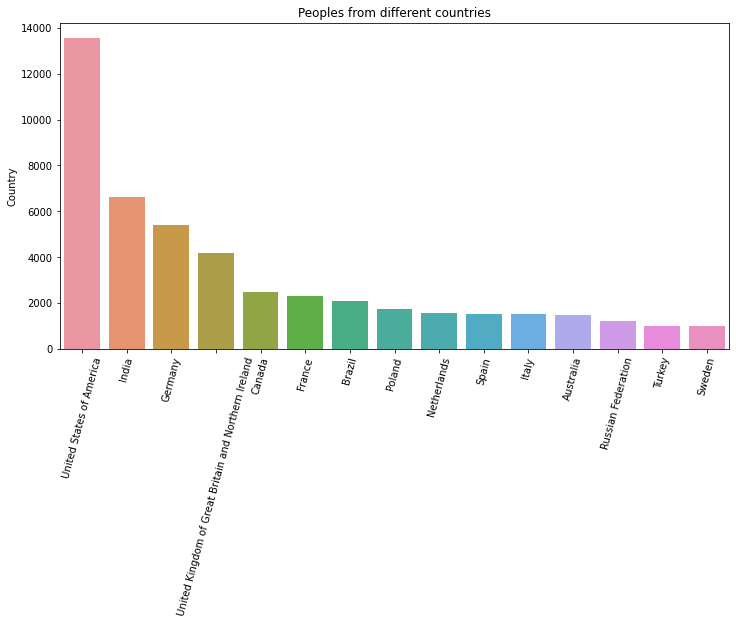

In [29]:
top_countries = data.Country.value_counts().head(15)
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Peoples from different countries')
sns.barplot(x=top_countries.index, y=top_countries);

It shows high number of respondents are from the US and India

Let's look at the distribution of responses for the Gender.

In [22]:
schema[schema['qname']=='Gender']

,qid,qname,question,force_resp,type,selector
45,QID122,Gender,"Which of the following describe you, if any? P...",False,MC,MAVR


In [27]:
gender_counts = data.Gender.value_counts().head(3)
gender_counts

Man                  64607
Woman                 3399
Prefer not to say     1172
Name: Gender, dtype: int64

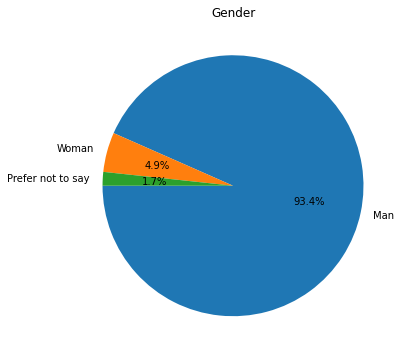

In [30]:
plt.figure(figsize=(12,6))
plt.title('Gender')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Education Levels

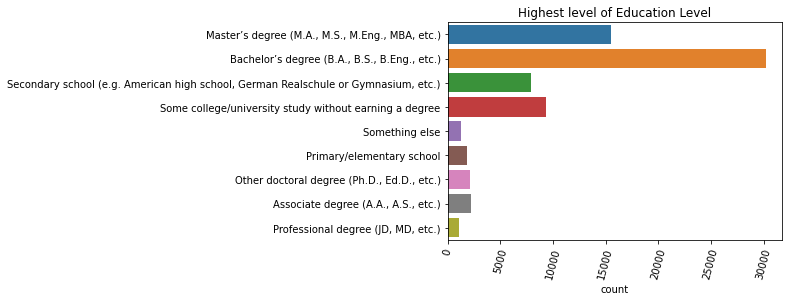

In [32]:
sns.countplot(y=data.EdLevel)
plt.xticks(rotation=75);
plt.title('Highest level of Education Level')
plt.ylabel(None);